In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

In [323]:
# csv폴더 안에 있는 card 퐅더 안에 있는 오프라인.csv 파일 로드
offline = pd.read_csv("./../csv/card/오프라인.csv", encoding = 'cp949')

In [324]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crym          2648 non-null   int64  
 1   tco_btc_nm    2648 non-null   object 
 2   ma_fem_dc     2648 non-null   int64  
 3   agegrp_dc     2648 non-null   int64  
 4   tco_btc_u_ct  2648 non-null   int64  
 5   tco_btc_u_am  2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB


In [325]:
offline.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [326]:
offline.describe()

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
count,2648.000000,2648.000000,2648.000000,2.648000e+03,2.648000e+03
mean,201996.672205,1.504532,44.878776,3.309869e+05,1.064912e+10
std,78.829105,0.500074,28.768254,4.645646e+05,1.755371e+10
min,201901.000000,1.000000,0.000000,1.000000e+00,1.500000e+03
25%,201909.000000,1.000000,20.000000,9.407500e+02,2.652966e+07
50%,202005.000000,2.000000,40.000000,1.053975e+05,2.589632e+09
75%,202101.000000,2.000000,70.000000,4.907440e+05,1.457397e+10
max,202109.000000,2.000000,90.000000,2.343320e+06,1.116790e+11


1. 컬럼의 이름을 변경 -> 항목정의서의 컬럼의 설명을 기준으로 컬럼의 이름을 변경
2. 결측치가 존재하는가?
    - non-null count을 기준으로 확인
    - 성별 컬럼에는 '-', '9' 라는 데이터가 존재하는가?
3. 기준년월의 데이터를 시계열 데이터로 변환
4. 남, 여 성별을 기준으로 연도별 건당 이용 금액의 평균은 어떠한 차이를 나타내는가?
    - 기준년월의 시계열에서 년도를 추출하여 새로운 컬럼에 대입
    - 건당이용금액 컬럼을 생성하여 총이용금액/ 총건수
    - 성별, 기준년 컬럼의 데이터로 그룹화 건당이용금액의 평군을 구한다.
5. 해당 데이터를 막대 그래프로 시각화

In [327]:
offline.columns = ['기준년월', '업종 구분', '성별', '연령대', '이용 건수', '이용 금액']

In [328]:
df = offline.copy()

In [329]:
offline.head()

,기준년월,업종 구분,성별,연령대,이용 건수,이용 금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [330]:
offline.isna().sum()

기준년월     0
업종 구분    0
성별       0
연령대      0
이용 건수    0
이용 금액    0
dtype: int64

In [331]:
# offline.isin(['-', '9', 9]).sum()
# offline.isin(['-', '9', 9]).any()

In [332]:
flag1 = offline['성별'] == '-'
flag2 = offline['성별'] == 9

offline.loc[flag1 | flag2]

,기준년월,업종 구분,성별,연령대,이용 건수,이용 금액


In [333]:
from datetime import datetime

In [334]:
offline['기준년월'].map(
    lambda x : datetime.strptime(str(x), "%Y%m")
)

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
2643   2021-09-01
2644   2021-09-01
2645   2021-09-01
2646   2021-09-01
2647   2021-09-01
Name: 기준년월, Length: 2648, dtype: datetime64[ns]

In [335]:
offline['기준년월'].astype(str).map(
    lambda x : datetime.strptime(x, "%Y%m")
)

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
2643   2021-09-01
2644   2021-09-01
2645   2021-09-01
2646   2021-09-01
2647   2021-09-01
Name: 기준년월, Length: 2648, dtype: datetime64[ns]

In [336]:
# '기준년월' 컬럼을 datetime 형태로 변경
offline['기준년월'] = pd.to_datetime(offline['기준년월'], format='%Y%m')

In [337]:
offline['기준년월']

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
2643   2021-09-01
2644   2021-09-01
2645   2021-09-01
2646   2021-09-01
2647   2021-09-01
Name: 기준년월, Length: 2648, dtype: datetime64[ns]

In [338]:
# 숫자형
offline['기준년월'].dt.year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2643    2021
2644    2021
2645    2021
2646    2021
2647    2021
Name: 기준년월, Length: 2648, dtype: int32

In [339]:
# 문자형
offline['기준년도'] = offline['기준년월'].dt.strftime('%Y')

In [340]:
offline['건당이용금액'] = (offline['이용 금액'] / offline['이용 건수']).round(2)

In [341]:
offline

,기준년월,업종 구분,성별,연령대,이용 건수,이용 금액,기준년도,건당이용금액
0,2019-01-01,백화점,1,1,1,7.600000e+03,2019,7600.00
1,2019-01-01,백화점,1,10,379,1.945872e+07,2019,51342.27
2,2019-01-01,백화점,1,20,45173,4.747711e+09,2019,105100.64
3,2019-01-01,백화점,1,30,271858,2.791826e+10,2019,102694.28
4,2019-01-01,백화점,1,40,391109,3.791149e+10,2019,96933.30
...,...,...,...,...,...,...,...,...
2643,2021-09-01,편의점,2,50,844081,6.283353e+09,2021,7444.02
2644,2021-09-01,편의점,2,60,243768,1.997442e+09,2021,8194.03
2645,2021-09-01,편의점,2,70,40523,3.524203e+08,2021,8696.80
2646,2021-09-01,편의점,2,80,6349,5.333488e+07,2021,8400.52


In [342]:
# 그래프의 한글깨짐 방지
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

In [343]:
group_data = offline.groupby(['기준년도','성별'])['건당이용금액'].mean()

In [344]:
group_data = group_data.unstack()

<Axes: xlabel='기준년도'>

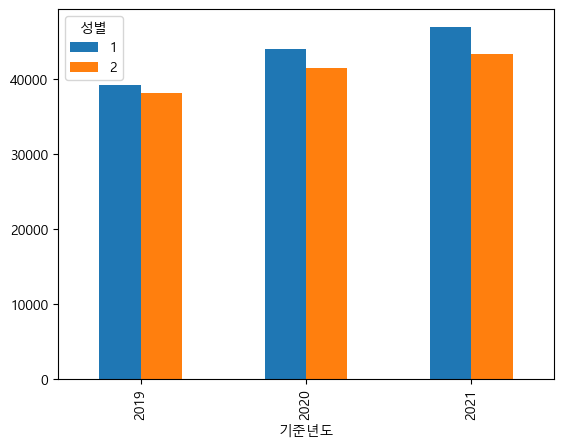

In [345]:
group_data.plot(kind='bar')

<Axes: xlabel='기준년도'>

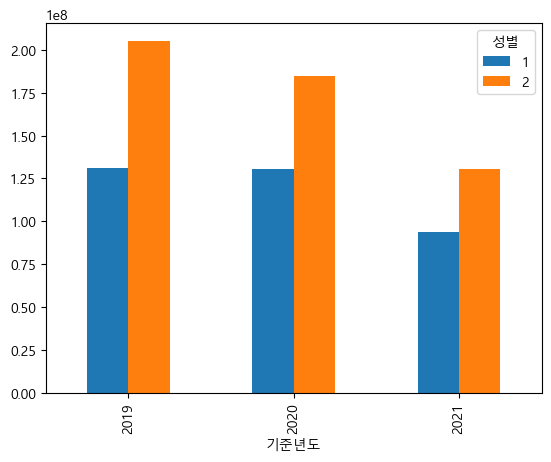

In [346]:
# 년도, 성별 이용 건수의 합계를 확인
# pivot을 사용
offline.pivot_table(
    index = '기준년도',
    columns= '성별',
    values = '이용 건수',
    aggfunc= 'sum'
).plot(kind='bar')

<Axes: xlabel='기준년월'>

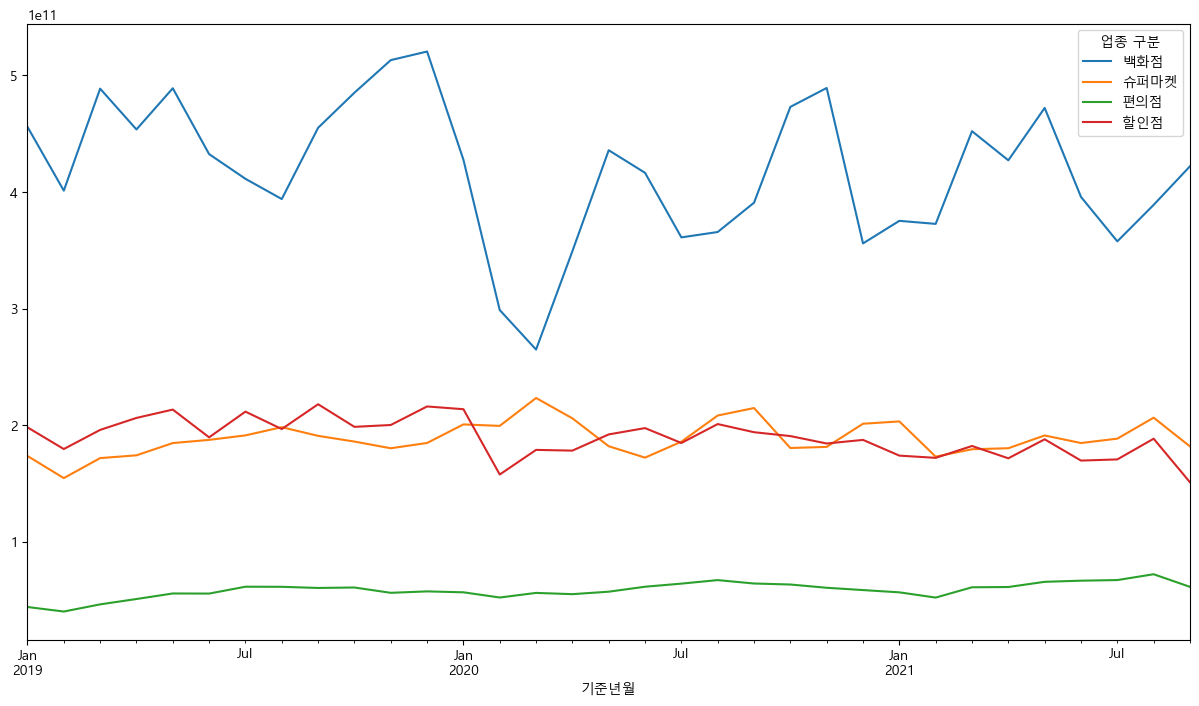

In [347]:
# 업종별 판맥 수익

offline.pivot_table(
    index = '기준년월',
    columns='업종 구분',
    values= '이용 금액',
    aggfunc= 'sum'
).plot(figsize=(15, 8))

In [348]:
# 업종, 연령대 별로 월별 이용금액의 합계, 총 이용건수확인
group_data2 = offline.pivot_table(
    index='기준년도',
    columns=['업종 구분', '연령대'],
    values= ['이용 건수', '이용 금액'],
    aggfunc= 'sum',
    fill_value=0
)


In [349]:
df1 = group_data2['이용 건수']
df2 = group_data2['이용 금액']

<Axes: xlabel='연령대'>

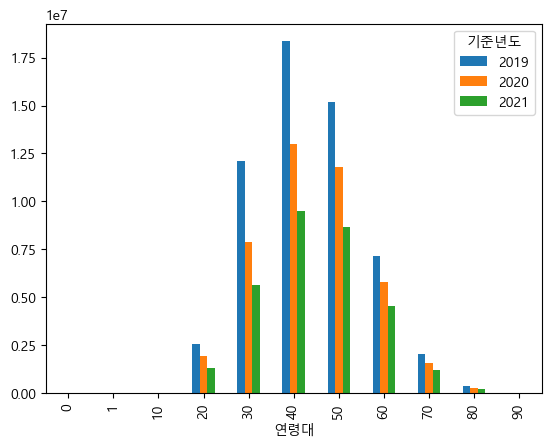

In [350]:
df1['백화점'].T.plot(kind='bar')

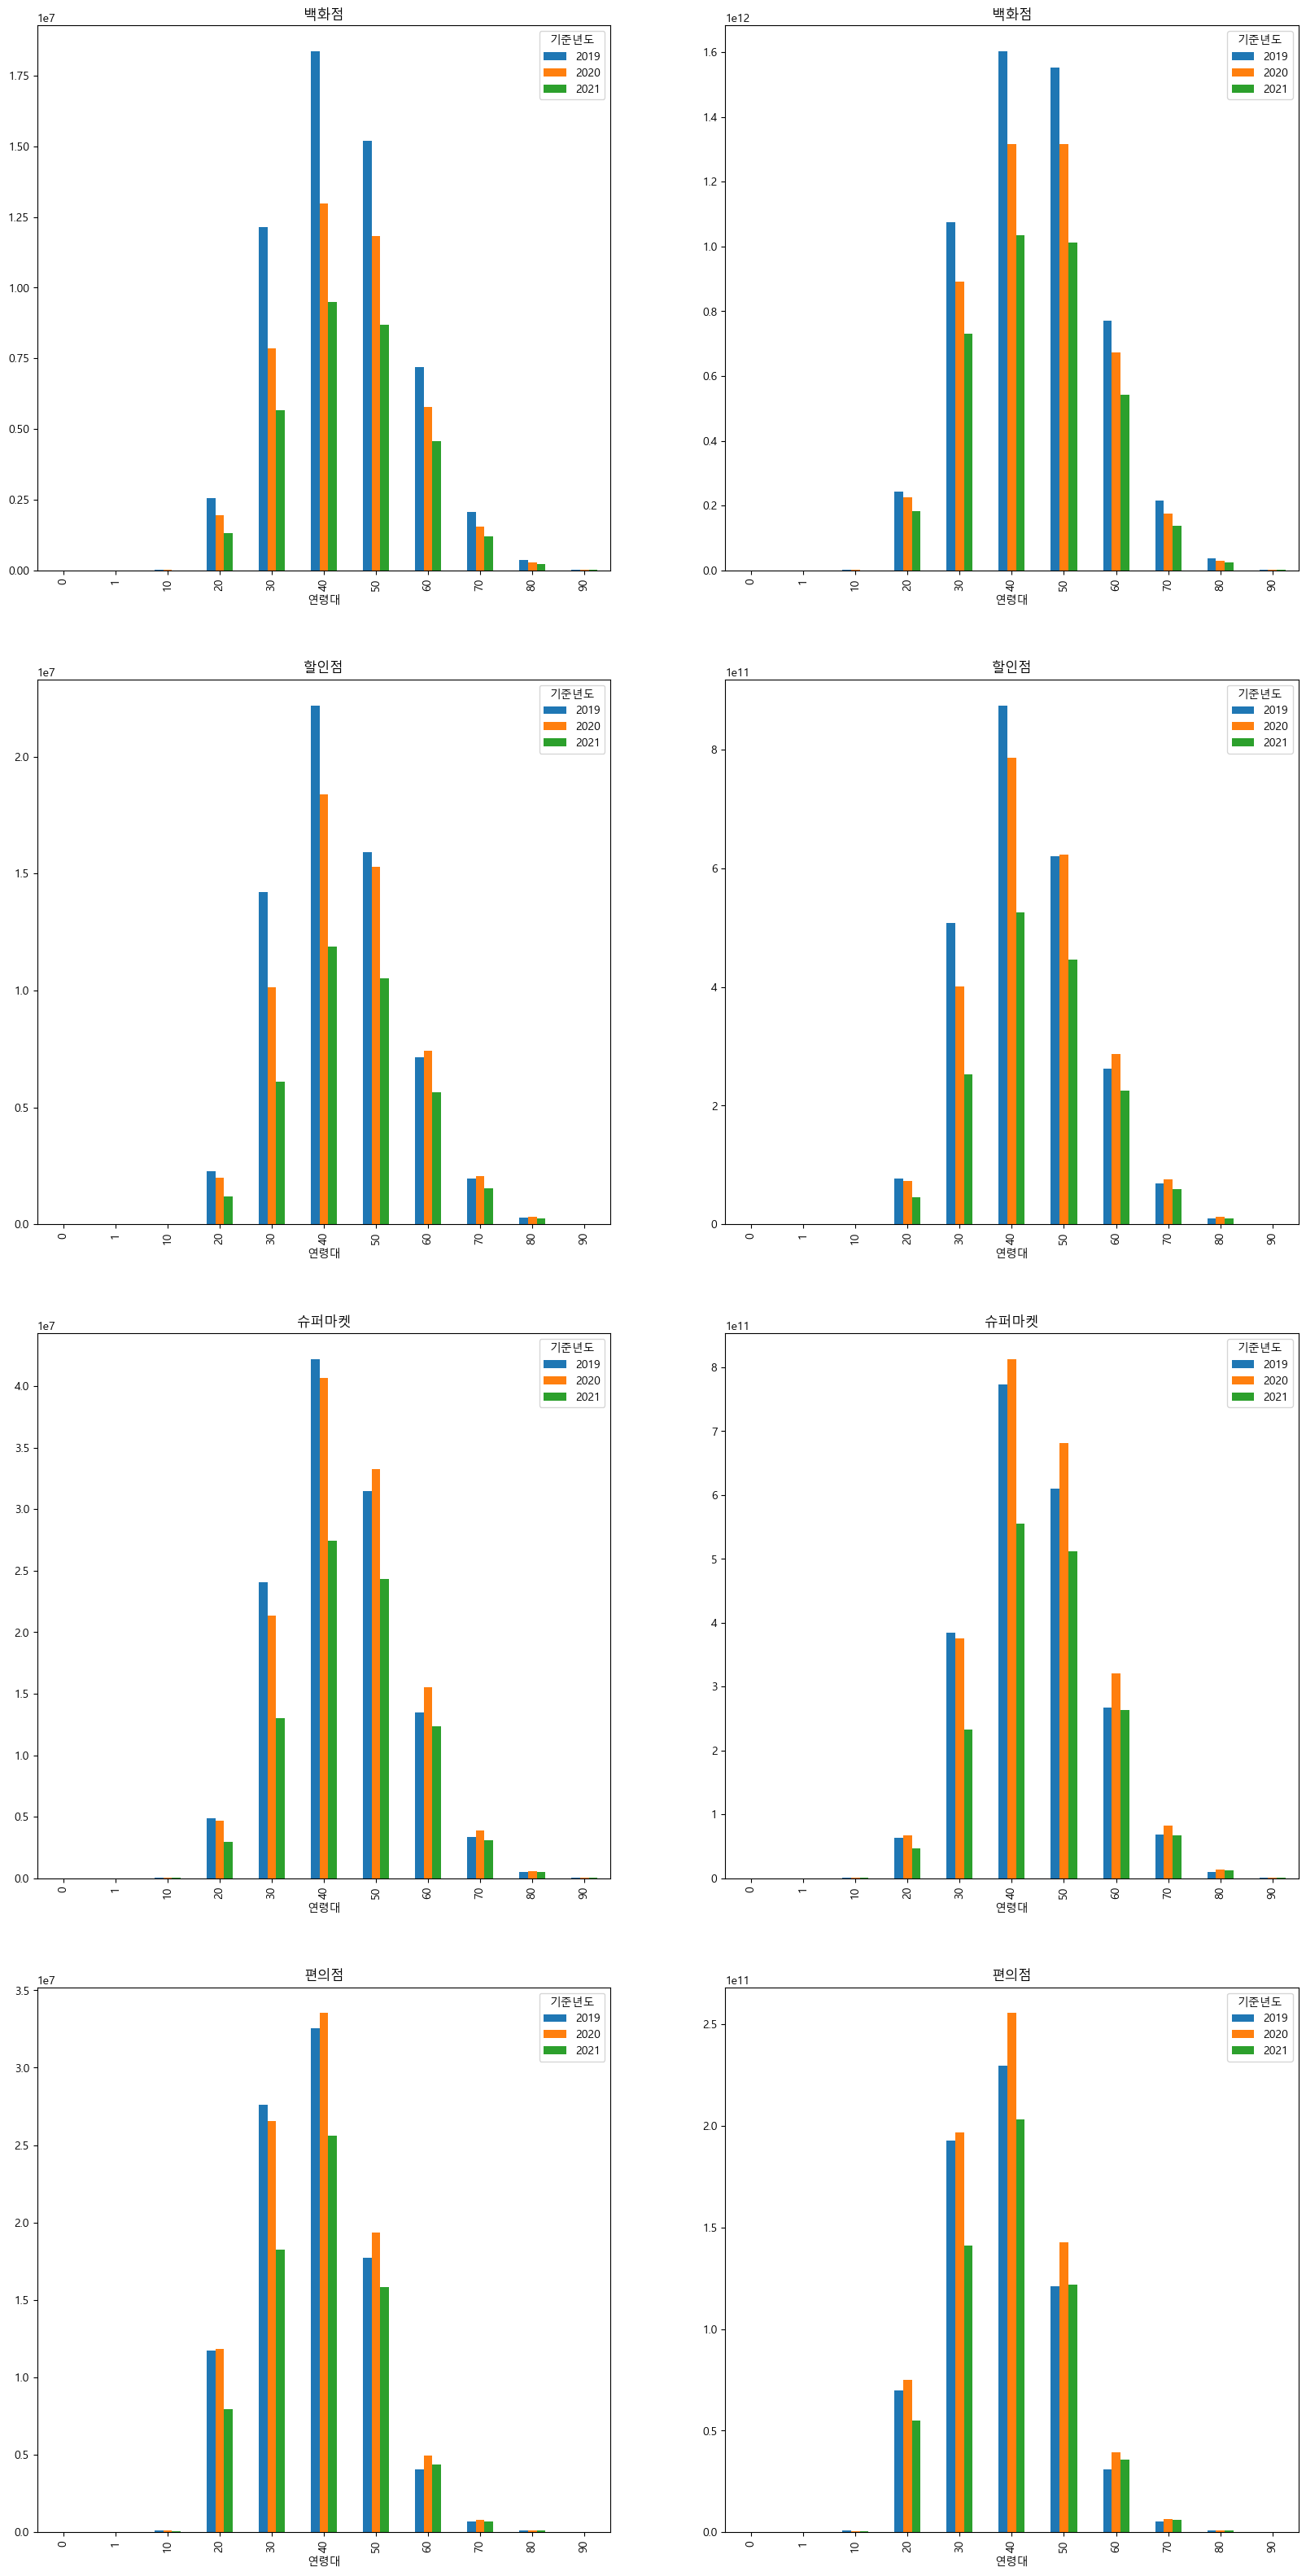

In [394]:
# 8개의 공간을 생성하고 반복 실행할때 행이 1씩 증가하는 위치에 그래프를 그린다.
plt.figure(figsize=(20, 40))
# 업종의 수만큼 반복 실행
_list = offline['업종 구분'].unique()
for i in range(len(_list)):
    # df1의 특정 컬럼을 선택하고 전치하여 막대그래프로 표시
    ax1 = plt.subplot(4, 2, i * 2 + 1)
    df1[_list[i]].T.plot(kind='bar', ax = ax1)
    # 그래프의 이름은 해당 컬럼의 이름으로 지정
    plt.title(_list[i])
    ax2 =  plt.subplot(4, 2, i * 2 + 2)
    df2[_list[i]].T.plot(kind='bar', ax = ax2)
    plt.title(_list[i])
    
plt.show()

In [400]:
online = pd.read_csv("../csv/card/온라인.csv", encoding= 'cp949')
offline = pd.read_csv("../csv/card/오프라인.csv", encoding= 'cp949')

In [401]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   crym          651 non-null    int64
 1   ma_fem_dc     651 non-null    int64
 2   agegrp_dc     651 non-null    int64
 3   tco_btc_u_ct  651 non-null    int64
 4   tco_btc_u_am  651 non-null    int64
dtypes: int64(5)
memory usage: 25.6 KB


In [402]:
# offline 컬럼의 이름을 변경
offline.columns = ['기준년월', '업종' ,'성별', '연령대', '이용건수','이용금액']
# online 컬럼의 이름을 변경
online.columns = ['기준년월', '성별', '연령대', '이용건수', '이용금액']

In [404]:
# offline과 online 데이터프레임 구조를 동일하게 만들기 위해 online의 '업종' 컬럼을 추가
online['업종'] = '온라인'

In [406]:
print(offline.columns)
print(online.columns)

Index(['기준년월', '업종', '성별', '연령대', '이용건수', '이용금액'], dtype='object')
Index(['기준년월', '성별', '연령대', '이용건수', '이용금액', '업종'], dtype='object')


In [411]:
df = pd.concat(
    [online, offline],
    axis = 'index',
    ignore_index= True
)

In [412]:
df

,기준년월,성별,연령대,이용건수,이용금액,업종
0,201901,1,1,1,1.106850e+05,온라인
1,201901,1,10,2333,9.810822e+07,온라인
2,201901,1,20,272915,1.385408e+10,온라인
3,201901,1,30,1320227,8.294613e+10,온라인
4,201901,1,40,1372052,9.555085e+10,온라인
...,...,...,...,...,...,...
3294,202109,2,50,844081,6.283353e+09,편의점
3295,202109,2,60,243768,1.997442e+09,편의점
3296,202109,2,70,40523,3.524203e+08,편의점
3297,202109,2,80,6349,5.333488e+07,편의점


In [418]:
# 업종, 기준년월 별 총 이용건수의 그래프 시각화
df.pivot_table(
    index = '기준년월',
    columns= '업종',
    values='이용건수',
    aggfunc= 'sum'
).plot

In [415]:
# 그래프로 시각화를 기준년월을 x축으로 지정을 하니 숫자형으로 인식하여 그래프 간격에 문제가 생김 -> 기준년월을 시계열 데이터로 변경
df['기준년월'] = pd.to_datetime(df['기준년월'], format="%Y%m")

<Axes: xlabel='기준년월'>

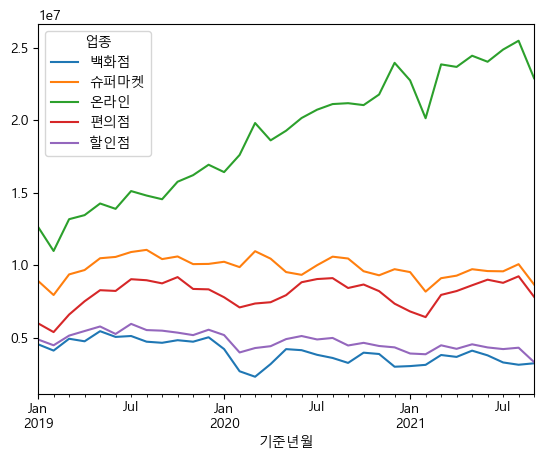

In [417]:
df.pivot_table(
    index='기준년월',
    columns='업종',
    values='이용건수',
    aggfunc='sum'
).plot()

- 온라인, 오프라인을 기준으로 총이용건수, 총이용금액을 그래프로 시각화 하여 출력
    - 파생변수 온/오프 생성하여 업종의 데이터의 값이 온라인이라면 0, 그외의 조건이라면 1

In [420]:
# case1 : 반복문을 이용
# 반복횟수는 df의 길이만큼, 업종 컬럼의 vlaue가 온라인인가?
# 빈 리스트에 반복할때마다 0, 1를 추가
# 만들어진 리스트를 새로운 파생변수에 추가
_list = []
# 위치를 기준으로 반복문 생성
for i in range(len(df)):
    # i에 대입이되는 데이터는 > ->df의 index의 위치
    # 조건식 사용
    if df.iloc[i, -1] == '온라인':
        _list.append(0)
    else:
        _list.append(1)
        
_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
_list = []
# 1차원 데이터(Series)를 기준으로 반복문을 생성
for name in df['업종']:
    # name에 대입되는 데이터는? -> Series에 Value가 하나씩 대입
    if name == '온라인':
        _list.append(0)
    else:
        _list.append(0)

In [434]:
# while문으로 반복 실행
_list2 = []
# 초기값
i=0
while i < len(df):
    if df['업종'][i] == '온라인':
        _list2.append(0)
    else:
        _list2.append(1)
        
    i += 1
    
_list2


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [436]:
(_list == _list2) & (len(_list) == len(_list2))

True

In [437]:
df['on/off'] = _list

<Axes: xlabel='기준년월'>

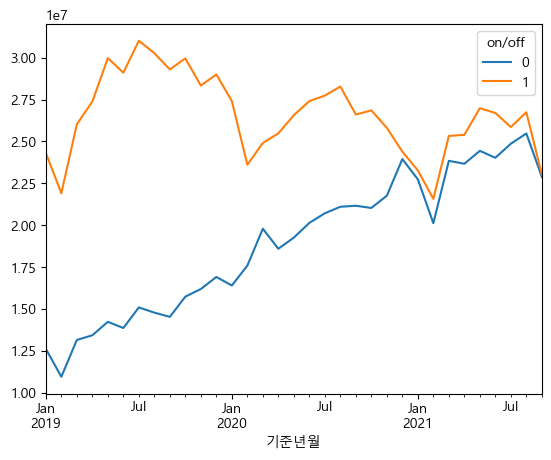

In [438]:
df.pivot_table(
    index = '기준년월',
    columns= 'on/off',
    values= '이용건수',
    aggfunc= 'sum'
).plot()

In [442]:
# on/off2 컬럼을 생성하여 map() 데이터를 추가
# lambda 에서 if문을 한줄로 표현
# '참인 경우 데이터' if 조건식 else '거짓인 경우 데이터'
df['on/off2'] = df['업종'].map(
    lambda x : 0 if x == '온라인' else 1
)


In [446]:
(df['on/off'] == df['on/off2']).all()

np.True_

In [447]:
# 파생 변수를 미리 생성하여 기본값을 설정
df['on/off3'] = 1

flag = df['업종'] == '온라인'

df.loc[flag, 'on/off3'] = 0

In [449]:
df.loc[:,'on/off' : 'on/off3'].sum(axis=1).value_counts()

3    2648
0     651
Name: count, dtype: int64

<Axes: xlabel='기준년월'>

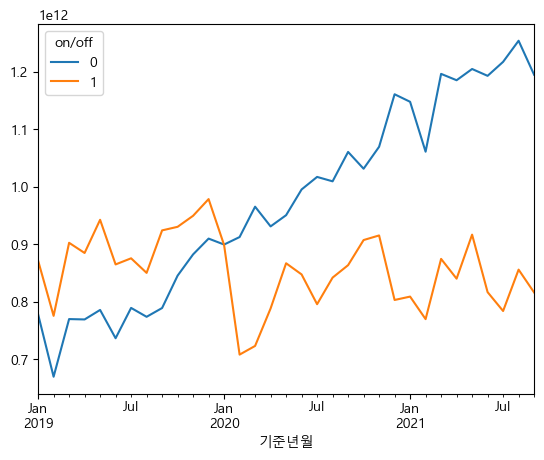

In [451]:
df.pivot_table(
    index='기준년월',
    columns='on/off',
    values='이용금액',
    aggfunc= 'sum'
).plot()